In [1]:

import sys
sys.path.append('../codes')

In [2]:
import torch
import numpy as np
import pandas as pd
from torch  import nn
from sklearn.preprocessing import OneHotEncoder

In [3]:
%load_ext autoreload
%autoreload 2
import networks
import utils
import config
import loss
import trainer
import pickle
import evaluator
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
tr_loader = utils.create_dataloader_by_geno_avg(config.training_data)

In [5]:
validation_loader = utils.create_dataloader_by_geno_avg(config.validation_data, 
                                                        is_training=False)

In [6]:
# utils.dump_pickle(tr_loader.dataset.weather_scaler, config.weather_scaler_path)
# utils.dump_pickle(tr_loader.dataset.target_scaler, config.target_scaler_path)

In [7]:
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:1


In [8]:
num_geno = tr_loader.dataset.data.shape[1]
model = networks.fc_avg_net(num_features = tr_loader.dataset.data.shape[1], hidden_dim=2000)

In [9]:
criterion = nn.MSELoss()

In [10]:
output = trainer.train_model_by_avg(model, tr_loader, validation_loader, criterion, config.model_avg_by_geno_path)

Current epoch: 400 Best epoch 370
Training Loss: 0.2690238498391644, training PCC: 0.6578050545386005
Validation Loss: 2.5197825928529105, validation PCC: 0.4313220531678753

Current epoch: 401 Best epoch 370
Training Loss: 0.29727439269904166, training PCC: 0.6089940345595205
Validation Loss: 2.0231812496980033, validation PCC: 0.4478953943412133

Current epoch: 402 Best epoch 370
Training Loss: 0.29817932291376975, training PCC: 0.6354166697959054
Validation Loss: 1.9128543039162953, validation PCC: 0.44722319771333074

Current epoch: 403 Best epoch 370
Training Loss: 0.2888366564387275, training PCC: 0.6192880208121576
Validation Loss: 2.0341953734556832, validation PCC: 0.4372242004122072

Current epoch: 404 Best epoch 370
Training Loss: 0.3145956410275352, training PCC: 0.6191052853760305
Validation Loss: 1.95679705341657, validation PCC: 0.44563069033582536

Current epoch: 405 Best epoch 370
Training Loss: 0.2853073113627972, training PCC: 0.6403796874968689
Validation Loss: 2.33

In [11]:
tr_loss, val_loss, tr_pccs, val_pccs = output

df = pd.DataFrame({
    'epochs': list(range(len(tr_loss))) * 2,
    'loss': list(tr_loss) + list(val_loss),
    'type': ['training'] * len(tr_loss) + ['validation'] * len(val_loss),
    'pcc': np.array(tr_pccs + val_pccs)
})

df.to_pickle('../outputs/avg_by_geno_training_outputs_' + config.version + '.pkl')

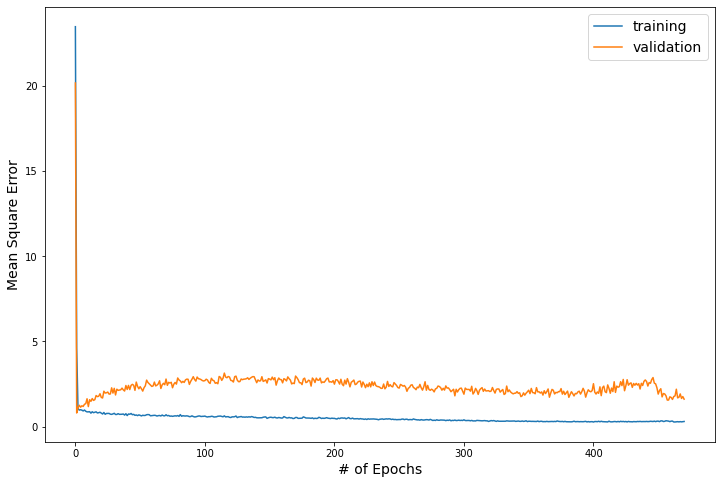

In [12]:
plt.figure(figsize = (12,8))
ax = sns.lineplot(data=df, x="epochs", y="loss", hue="type")
ax.set_xlabel("# of Epochs", fontsize = 14)
ax.set_ylabel("Mean Square Error", fontsize = 14)
ax.legend(fontsize=14)
fig = ax.get_figure()
fig.savefig('../figures/loss_avg_by_geno_' + config.version + '.jpeg', dpi=256 )


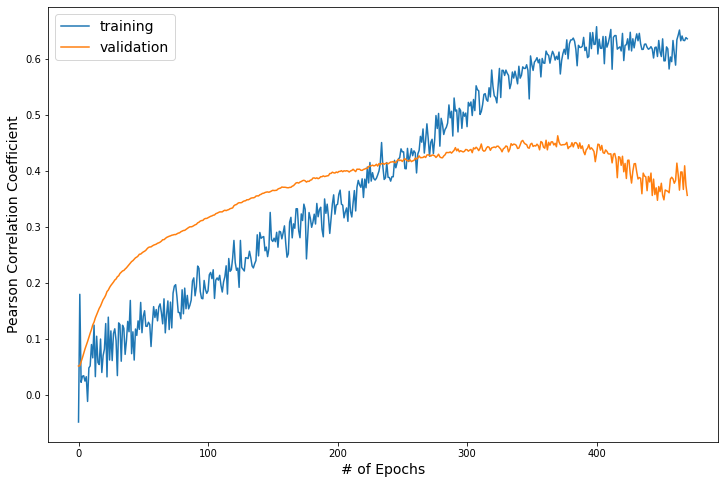

In [13]:
plt.figure(figsize = (12,8))
ax = sns.lineplot(data=df, x="epochs", y="pcc", hue="type")
fig = ax.get_figure()
ax.set_xlabel("# of Epochs", fontsize = 14)
ax.set_ylabel("Pearson Correlation Coefficient", fontsize = 14)
ax.legend(fontsize=14)
fig.savefig('../figures/pcc_avg_by_geno_' + config.version + '.jpeg', dpi=256)